# 911 Calls Project

For this project I'm going to analyze some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
import numpy as np
import pandas as pd

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Overview

** The Top 5 zipcodes for 911 calls are 6979, 6643, 4854, 4748, 3174**

In [16]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** The Top 5 townships (twp) for 911 calls are LOWER MERION, ABINGTON, UPPER NORRISTOWN, MERION, CHELTENHAM **

In [19]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** There are 110 uniqe reasons for calling 911 **

In [20]:
df['title'].nunique()

110

## Main Reasons for Calling 911

**  The title column include "Reasons/Departments". Split and extract the main reasons of 911 which are EMS, Fire, and Traffic.  ** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [21]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

** The most common Reason for a 911 call are EMS, Traffic and Fire. And here is a countplot below. The are 48877 times that people called 911 because of EMS issue, 35695 for the traffic issue and 14920 for fire issue**

In [24]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

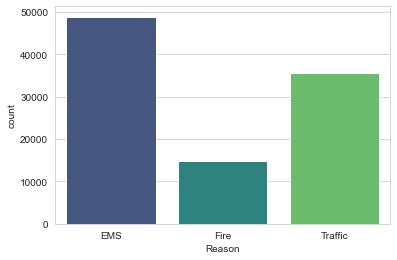

In [98]:
sns.countplot(x ='Reason',data = df,palette='viridis')

___

** Convert the timeStamp column from strings to DateTime objects. Then create 4 new columns called Hour, Month, Day of Week and Date based off of the timeStamp column. **

In [46]:
type(df['timeStamp'].iloc[0])

str

In [53]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [59]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [112]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)
df['Date'] = df['timeStamp'].apply(lambda x : x.date())
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

## Frequency of 911 calls on each day of the week

** From the data we can clearly see that Friday has the most frequent EMS 911 call, Tuesday has the most Traffic 911 call and Monday has the most Fire issue 911 calls **

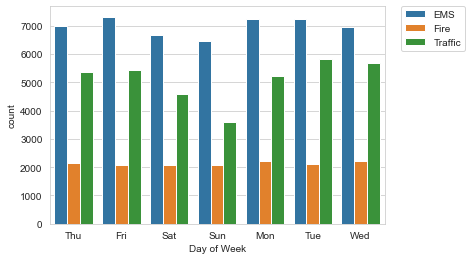

In [97]:
sns.countplot(x='Day of Week',data = df,hue = 'Reason')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Frequency of 911 calls on each Month

** Based on the graph, January has the highest frequency of calling 911 no matter what reason. **

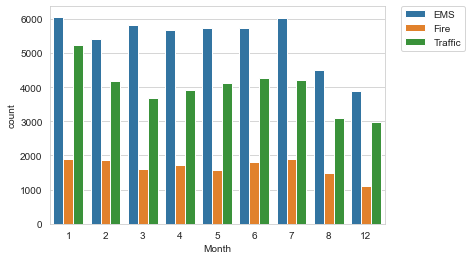

In [96]:
sns.countplot(x='Month',data = df,hue = 'Reason')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [119]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** From the Line plot, we can see the frequency of 911 calls will have significant drop after July. The highest peak as I mentioned is in January. **

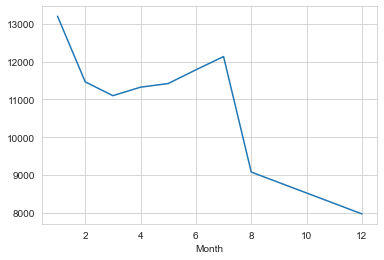

In [151]:
byMonth['lat'].plot(kind = 'line')

** The linear fit on the number of calls per month shows the decreasing trend. **

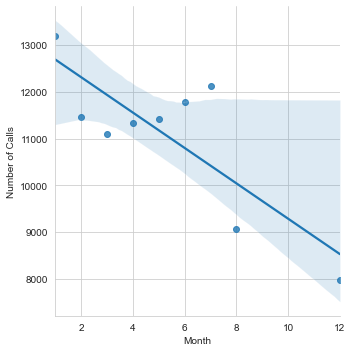

In [121]:
fig = sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
fig.set(ylabel = 'Number of Calls')

## Frequency of 911 calls on each Date

** Through groupby the Date we can clearly see the overall number of calls reach surpass 900 at the end of January in 2016. **

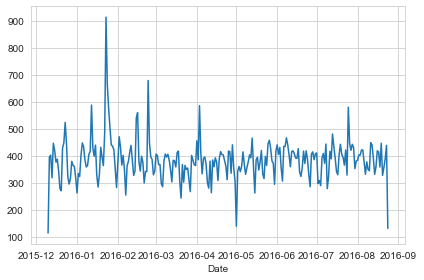

In [123]:
ByDate = df.groupby('Date').count()
ByDate['lat'].plot()
plt.tight_layout()

** Presenting Traffic issue of 911 call based on the date. Highest peak is in January 2016. **

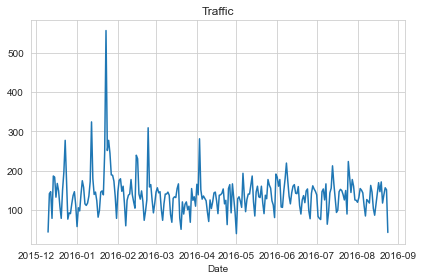

In [134]:
ByDateTraffic = df[df['Reason'] == 'Traffic'].groupby('Date').count()
ByDateTraffic['lat'].plot(title = 'Traffic')
plt.tight_layout()

** Presenting Fire issue of 911 call based on the date. Highest peak is in February 2016. **

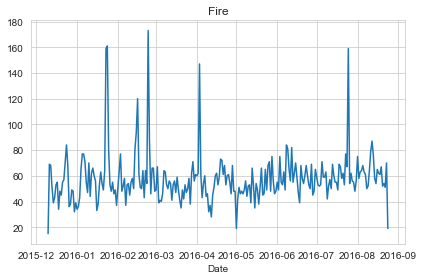

In [135]:
ByDateTraffic = df[df['Reason'] == 'Fire'].groupby('Date').count()
ByDateTraffic['lat'].plot(title = 'Fire')
plt.tight_layout()

** Presenting EMS issue of 911 call based on the date. Highest peak is in Januaray 2016. **

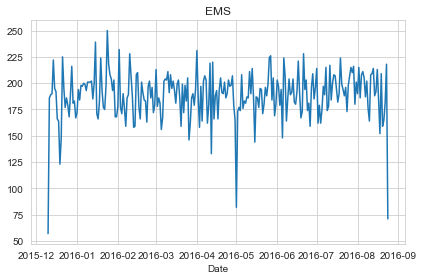

In [136]:
ByDateTraffic = df[df['Reason'] == 'EMS'].groupby('Date').count()
ByDateTraffic['lat'].plot(title = 'EMS')
plt.tight_layout()

____
## Frequency of 911 calls in Heatmap and Clustermap

In [145]:
dayHour = df.groupby(['Day of Week','Hour']).count()['lat'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Trough the Heat map we can see that the call mainly happend during day time from 8 am to 6 pm. **

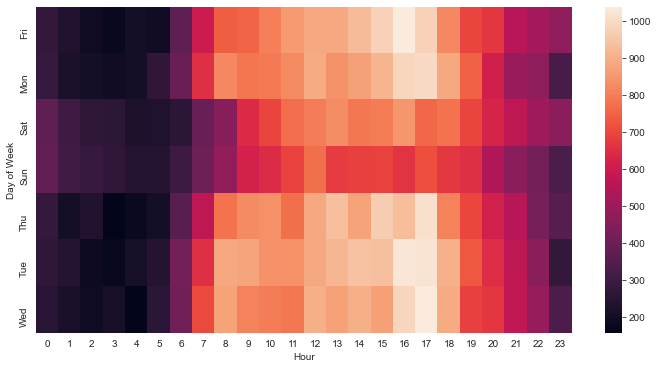

In [152]:
plt.figure(figsize = (12,6))
sns.heatmap(data = dayHour)

** Through the Cluster map, we can see that 911 got most of the calls between Wednesday to Sunday. Less calls in the midnight, most calls during the day time **

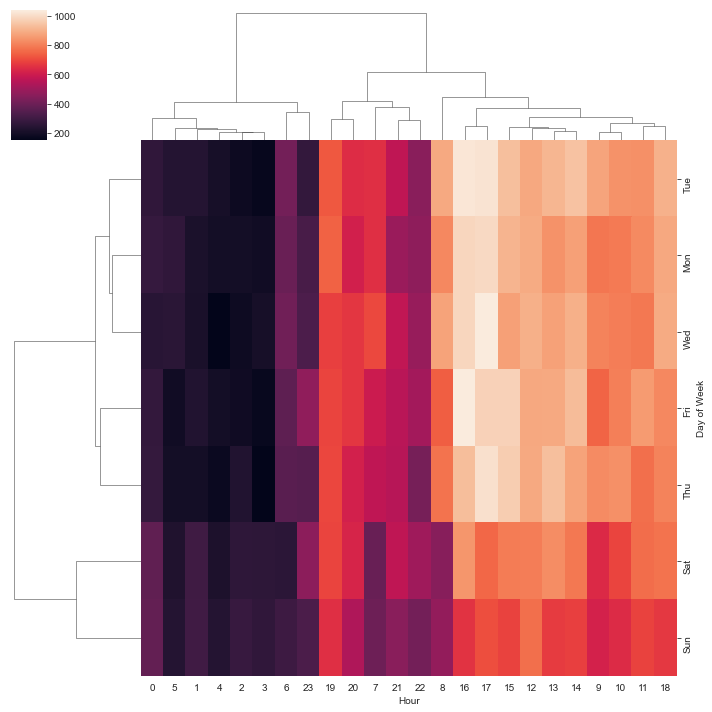

In [153]:
sns.clustermap(data=dayHour)

In [163]:
DayMonth = df.groupby(['Day of Week','Month']).count()['lat'].unstack()
DayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


** Trough the Heat map we can see that the call mainly happend in January and from March to July. August and December has relatively less calls **

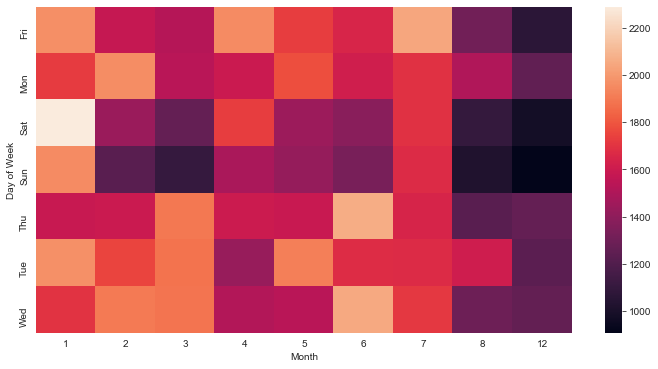

In [166]:
plt.figure(figsize = (12,6))
sns.heatmap(data=DayMonth)

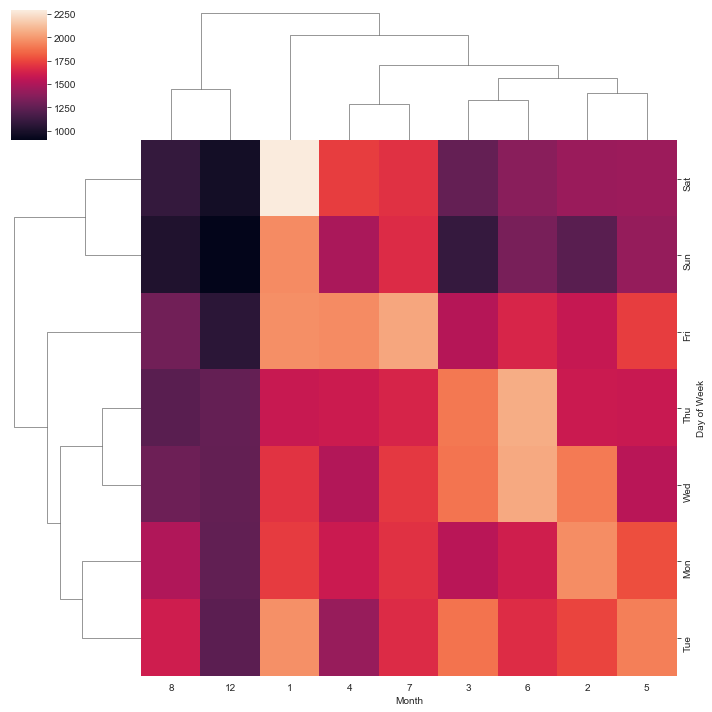

In [169]:
sns.clustermap(data = DayMonth)